# Lab 5: Midterm Review on `gapminder` dataset

In [21]:
# install.packages('dslabs') # install this package if it's not installed
library(dslabs)
library(tidyverse)

In [22]:
gapminder %>% glimpse

Rows: 10,545
Columns: 9
$ country          <fct> Albania, Algeria, Angola, Antigua and Barbuda, Argent…
$ year             <int> 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,…
$ infant_mortality <dbl> 115.40, 148.20, 208.00, NA, 59.87, NA, NA, 20.30, 37.…
$ life_expectancy  <dbl> 62.87, 47.50, 35.98, 62.97, 65.39, 66.86, 65.66, 70.8…
$ fertility        <dbl> 6.19, 7.65, 7.32, 4.43, 3.11, 4.55, 4.82, 3.45, 2.70,…
$ population       <dbl> 1636054, 11124892, 5270844, 54681, 20619075, 1867396,…
$ gdp              <dbl> NA, 13828152297, NA, NA, 108322326649, NA, NA, 966778…
$ continent        <fct> Europe, Africa, Africa, Americas, Americas, Asia, Ame…
$ region           <fct> Southern Europe, Northern Africa, Middle Africa, Cari…


### 1 Filter out all countries with `NA` for gdp and assign filtered dataset to a variable called `df`

In [23]:
df = gapminder %>% filter(!is.na(gdp))

head(df)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
2,Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
3,Australia,1960,20.30,70.87,3.45,10292328,96677859364,Oceania,Australia and New Zealand
4,Austria,1960,37.30,68.75,2.70,7065525,52392699681,Europe,Western Europe
5,Bahamas,1960,51.00,62.00,4.50,109526,1306269490,Americas,Caribbean
6,Bangladesh,1960,176.30,46.20,6.73,48200702,12767231590,Asia,Southern Asia


### 2 `gdp` is in dollars. Convert it to billion dollars and save it to same dataset

In [24]:
df = df %>% mutate(gdp = gdp/1e9)

head(df)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Algeria,1960,148.20,47.50,7.65,11124892,13.828152,Africa,Northern Africa
2,Argentina,1960,59.87,65.39,3.11,20619075,108.322327,Americas,South America
3,Australia,1960,20.30,70.87,3.45,10292328,96.677859,Oceania,Australia and New Zealand
4,Austria,1960,37.30,68.75,2.70,7065525,52.392700,Europe,Western Europe
5,Bahamas,1960,51.00,62.00,4.50,109526,1.306269,Americas,Caribbean
6,Bangladesh,1960,176.30,46.20,6.73,48200702,12.767232,Asia,Southern Asia


### 3 Select only the countries which have data in 2011 and save it to `df2011`. 

In [25]:
df2011 = df %>% filter(year == 2011)

head(df2011)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Albania,2011,14.3,77.4,1.75,2886010,6.3216909,Europe,Southern Europe
2,Algeria,2011,22.8,76.1,2.83,36717132,81.1434481,Africa,Northern Africa
3,Angola,2011,106.8,58.1,6.10,21942296,27.0139358,Africa,Middle Africa
4,Antigua and Barbuda,2011,7.2,75.9,2.12,88152,0.8017879,Americas,Caribbean
5,Argentina,2011,12.7,76.0,2.20,41655616,472.9352552,Americas,South America
6,Armenia,2011,15.3,73.5,1.50,2967984,4.2909906,Asia,Western Asia


### 4 Which countries have data in both 1960 and 2011?

In [26]:
countries1960 = df %>% filter(year == 1960) %>% select(country) %>% deframe

df2011 %>% filter(country %in% countries1960) %>% select(country) %>% deframe

[1] Algeria                        Argentina                     
 [3] Australia                      Austria                       
 [5] Bahamas                        Bangladesh                    
 [7] Belgium                        Belize                        
 [9] Benin                          Bolivia                       
[11] Botswana                       Brazil                        
[13] Burkina Faso                   Burundi                       
[15] Cameroon                       Canada                        
[17] Central African Republic       Chad                          
[19] Chile                          China                         
[21] Colombia                       Congo, Dem. Rep.              
[23] Congo, Rep.                    Costa Rica                    
[25] Cote d'Ivoire                  Denmark                       
[27] Dominican Republic             Ecuador                       
[29] Egypt                          El Salvador                   
[31] Fiji                           Finland                       
[33] France                         Gabon                         
[35] Ghana                          Greece                        
[37] Guatemala                      Honduras                      
[39] Hungary                        Iceland                       
[41] India                          Indonesia                     
[43] Israel                         Italy                         
[45] Japan                          Kenya                         
[47] South Korea                    Lesotho                       
[49] Liberia                        Luxembourg                    
[51] Madagascar                     Malawi                        
[53] Malaysia                       Mauritania                    
[55] Mexico                         Morocco                       
[57] Nepal                          Netherlands                   
[59] Nicaragua                      Niger                         
[61] Nigeria                        Norway                        
[63] Oman                           Pakistan                      
[65] Panama                         Papua New Guinea              
[67] Paraguay                       Peru                          
[69] Philippines                    Portugal                      
[71] Rwanda                         St. Vincent and the Grenadines
[73] Senegal                        Seychelles                    
[75] Sierra Leone                   Singapore                     
[77] South Africa                   Spain                         
[79] Sri Lanka                      Sudan                         
[81] Sweden                         Thailand                      
[83] Togo                           Trinidad and Tobago           
[85] Turkey                         United Kingdom                
[87] United States                  Uruguay                       
[89] Venezuela                      Zambia                        
[91] Zimbabwe                      
185 Levels: Albania Algeria Angola Antigua and Barbuda Argentina ... Zimbabwe

### 5 Using `df2011`, create a `gdp` box plot for each region. Make sure the region names are legible and also use `log scale`

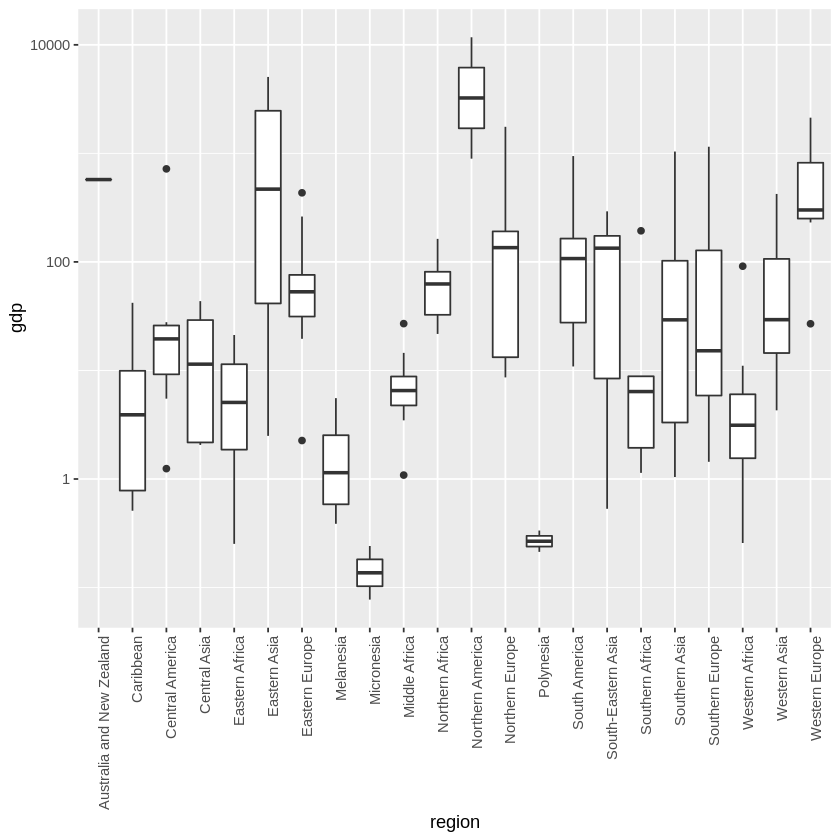

In [27]:
df2011 %>% ggplot(aes(x = region, y = gdp)) + 
geom_boxplot() + scale_y_log10() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

### 6 Using `df2011`, find the maximum and minimum `gdp` in each region

In [28]:
df2011 %>% group_by(region) %>% summarise(min_gdp = min(gdp), max_gdp = max(gdp))

,region,min_gdp,max_gdp
,<fct>,<dbl>,<dbl>
1,Australia and New Zealand,573.45398217,5.734540e+02
2,Caribbean,0.50986673,4.199806e+01
3,Central America,1.24595697,7.197424e+02
4,Central Asia,2.06071523,4.354728e+01
5,Eastern Africa,0.25273737,2.122808e+01
6,Eastern Asia,2.49791871,5.058762e+03
7,Eastern Europe,2.26158771,4.331921e+02
8,Melanesia,0.38648318,5.563353e+00
9,Micronesia,0.07739471,2.415812e-01


### 7 Using `df2011`, Find the avarage gdp in the world. Calculate the percentage of countries which has a gdp more than the world avarage in each region. Use 2 types of avarage: median and mean.

In [29]:
world_mean = df2011 %>% summarise(mean(gdp)) %>% deframe
print(world_mean)

world_median = df2011 %>% summarise(median(gdp)) %>% deframe
print(world_median)

[1] 246.9549
[1] 16.03127


In [30]:
df2011 %>% group_by(region) %>% 
summarise(perc_mean = sum(gdp>world_mean)/n(), perc_median = sum(gdp>world_median)/n()) %>% 
arrange(desc(perc_median), desc(perc_mean))

region,perc_mean,perc_median
<fct>,<dbl>,<dbl>
Australia and New Zealand,1.0000000,1.0000000
Northern America,1.0000000,1.0000000
Western Europe,0.7142857,1.0000000
Northern Africa,0.0000000,1.0000000
Eastern Europe,0.2000000,0.9000000
Eastern Asia,0.6666667,0.8333333
South America,0.2000000,0.8000000
Northern Europe,0.2000000,0.7000000
Western Asia,0.1333333,0.6666667


### 8 Using `df2011`, Find the gdp per capita which is simply $GDP_{per capita} = \frac{GDP}{Population}$. And find an appropriate plot to show its relationship with `gdp`, conditioned on `continent`.

`geom_smooth()` using formula 'y ~ x'



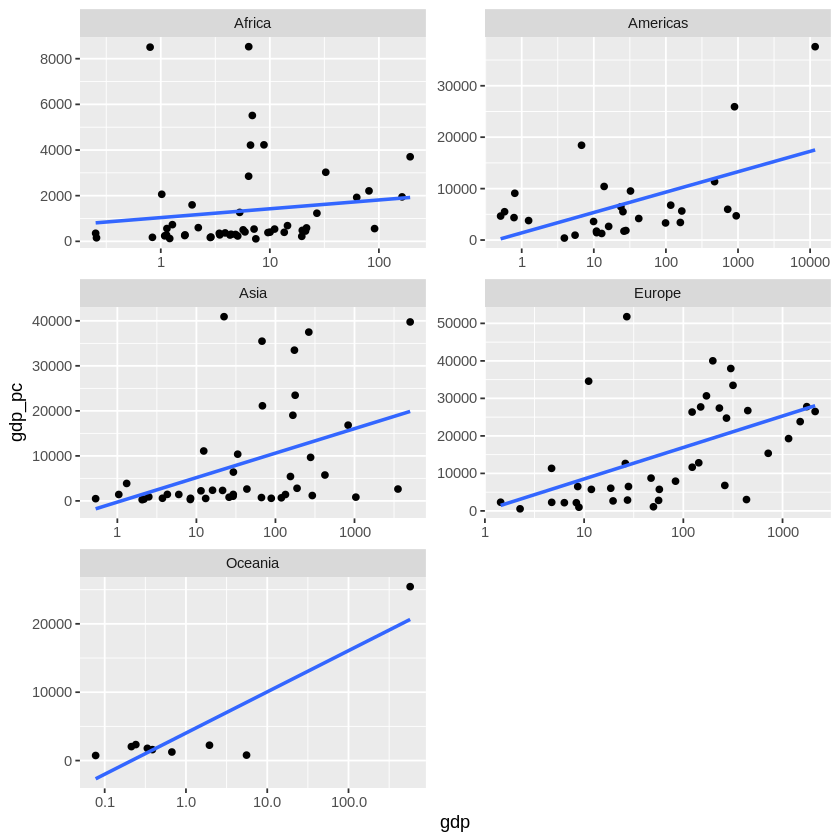

In [31]:
df2011 = df2011 %>% mutate(gdp_pc = 1e9*gdp/population)

df2011 %>%
ggplot(aes(x = gdp, y = gdp_pc)) + geom_point() + scale_x_log10() + geom_smooth(method = 'lm', se = F) + 
facet_wrap(~continent, scale = "free", nrow = 3)

### 9 Which country has the largest gdp per capita, among the ones that has $gdp>1000$ billion.

In [32]:
df2011 %>% filter(gdp>1000) %>% arrange(desc(gdp_pc)) %>% head(1)

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region,gdp_pc
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
1,Japan,2011,2.3,82.6,1.39,127252900,5058.762,Asia,Eastern Asia,39753.61


### 10 Which country has the life expectancy which is closest to life expectancy in US. Is it a single country? or countries?

In [33]:
US_LE = df2011 %>% filter(country == "United States") %>% select(life_expectancy) %>% deframe

df2011 %>% mutate(around_US = abs(life_expectancy - US_LE)) %>% arrange(around_US) %>% head

,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region,gdp_pc,around_US
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
1,Chile,2011,7.5,78.9,1.84,17201305,116.63155,Americas,South America,6780.389,0.0
2,Saudi Arabia,2011,14.2,78.9,2.76,28788438,278.40347,Asia,Western Asia,9670.669,0.0
3,United States,2011,6.1,78.9,1.90,312390368,11744.21946,Americas,Northern America,37594.691,0.0
4,Kuwait,2011,8.9,79.0,2.65,3239181,68.43929,Asia,Western Asia,21128.580,0.1
5,Turkey,2011,15.3,78.8,2.08,73517002,422.73876,Asia,Western Asia,5750.218,0.1
6,Peru,2011,15.6,78.5,2.48,29759891,98.90126,Americas,South America,3323.307,0.4
